In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import io

n = 1000
p = 2
shape = (p, n)
dt = np.double

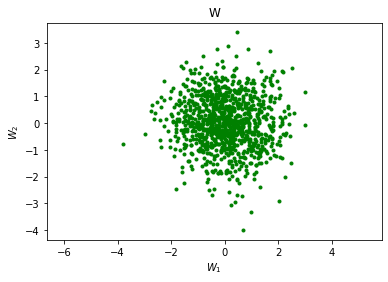

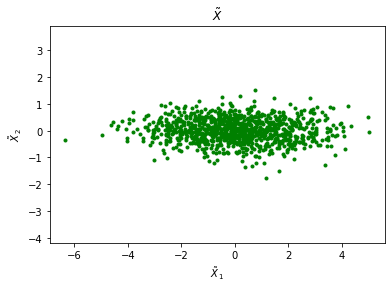

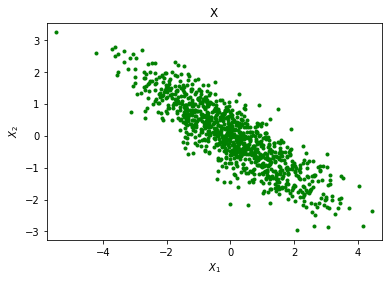

In [26]:
#Q2.1
# bulk comment: ctrl+/

Rx = np.array([[2, -1.2], 
               [-1.2, 1]])

# generating samples of i.i.d Gaussian random vectors
Rw = np.array([[1, 0], 
               [0, 1]])
W = np.random.normal(0, 1, p*n)
W = np.reshape(W, shape)

# generate scaled random vectors
evals, evects = np.linalg.eig(Rx)
lam = np.array([[evals[0], 0],
                [0, evals[1]]])
nevals = lam**(1/2)
Xtil = np.zeros(shape,dtype=dt)
for i in range(n):
    Xtil.T[i] = np.dot(nevals, W.T[i])

# generate samples
X = np.zeros(shape,dtype=dt)
for i in range(n):
    X.T[i] = np.dot(evects, Xtil.T[i])
    
# producing scatter plots
plt.plot(W[0,:], W[1,:],'g.')
plt.axis('equal')
plt.xlabel('$W_1$')
plt.ylabel('$W_2$')
plt.title('W')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("W.tif")
png1.close()
plt.show()

plt.plot(Xtil[0,:], Xtil[1,:],'g.')
plt.axis('equal')
plt.xlabel(r"$\~X_1$")
plt.ylabel(r"$\~X_2$")
plt.title(r"$\~X$")

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("Xtil.tif")
png1.close()
plt.show()

plt.plot(X[0,:], X[1,:],'g.')
plt.axis('equal')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('X')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("X.tif")
png1.close()
plt.show()

Rx estimate is:  [[ 2.06870806 -1.28798091]
 [-1.28798091  1.08446161]]
Rw estimate is:  [[ 1.05527522 -0.05493662]
 [-0.05493662  0.992009  ]]


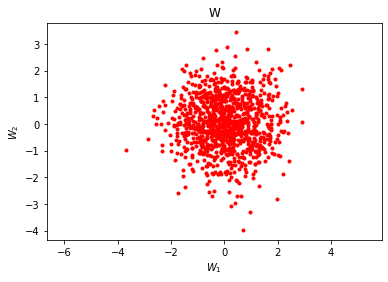

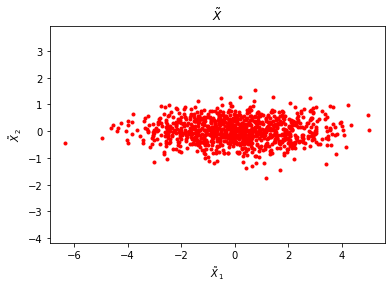

In [27]:
# Q2.2
# estimating covariance matrix R_est
shape = (p, 1)
count = np.zeros(shape,dtype=dt)
for i in range(n):
    count += np.reshape(X.T[i],(p,1))

mu = (1/n)*count
shape = (p, p)
count = np.zeros(shape,dtype=dt)
for i in range(n):
    Z = np.reshape(X[:,i],(p,1)) - mu
    Zt = np.transpose(Z)
    count += np.dot(Z, Zt)
    
R_est = (1/(n-1))*count
print("Rx estimate is: ", R_est)

# de-correlating samples
evals, evects = np.linalg.eig(R_est)
shape = (p, n)
Xtil_est = np.zeros(shape,dtype=dt)
for i in range(n):
    Xtil_est.T[i] = np.dot(np.transpose(evects),X.T[i])

# fully whitening samples & calculating covariance matrix of W, R_w_est
nevals = np.array([[evals[0]**(-1/2), 0],
                [0, evals[1]**(-1/2)]])
W_est = np.zeros(shape,dtype=dt)
for i in range(n):
    W_est.T[i] = np.dot(nevals,Xtil_est.T[i])
    
shape = (p, 1)
count = np.zeros(shape,dtype=dt)
for i in range(n):
    count += np.reshape(W_est.T[i],(p,1))

mu = (1/n)*count
shape = (p, p)
count = np.zeros(shape,dtype=dt)
for i in range(n):
    Z = np.reshape(W[:,i],(p,1)) - mu
    Zt = np.transpose(Z)
    count += np.dot(Z, Zt)
    
R_w_est = (1/(n-1))*count
print("Rw estimate is: ", R_w_est)
    
# producing scatter plots
plt.plot(W_est[0,:], W_est[1,:],'r.')
plt.axis('equal')
plt.xlabel('$W_1$')
plt.ylabel('$W_2$')
plt.title('W')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("Wnew.tif")
png1.close()
plt.show()

plt.plot(Xtil_est[0,:], Xtil_est[1,:],'r.')
plt.axis('equal')
plt.xlabel(r"$\~X_1$")
plt.ylabel(r"$\~X_2$")
plt.title(r"$\~X$")

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("Xnew.tif")
png1.close()
plt.show()